# Explore here

In [43]:
# Your code here
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Planteamiento del problema y recolección de la data

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

In [2]:
# Lectura y guardado data
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df_diabetes=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [4]:
# Guardado de la data
df_diabetes = pd.read_csv(url)
df_diabetes_inicial = pd.read_csv(url)


# Ruta de destino
ruta_destino = '/workspaces/Proyecto-Arbol-de-Decision/data/raw/diabetes.csv'
ruta_destino_i = '/workspaces/Proyecto-Arbol-de-Decision/data/raw/diabetes_inicial.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_destino), exist_ok=True)

# Guardar el DataFrame en la ruta especificada con una copia de la data original
df_diabetes.to_csv(ruta_destino, index=False)
df_diabetes_inicial.to_csv(ruta_destino_i, index=False)

print(f'Archivo guardado en: {ruta_destino}')

Archivo guardado en: /workspaces/Proyecto-Arbol-de-Decision/data/raw/diabetes.csv


In [5]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Exploración y limpieza de los Datos

In [9]:
# Valores Nulos
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Valores duplicados
df_diabetes.duplicated().sum()

np.int64(0)

Los datos estan conformados por 768 valores, 7 variables incluyendo la clase a predecir (Outcome)

las predictoras estan conformadas por: Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction y Age.

* No existen valores nulos ni duplicados. 

La distribucion de los tipos de variables es la siguiente:

* Pregnancies int64
* Glucose int64
* Insulin int64
* BMI float64
* DiabetesPedigreeFunction float64
* Age int64
* Outcome int64

# Análisis de variables univariante

Variables Numéricas

In [12]:
df_diabetes.Outcome.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [14]:
df_diabetes.loc[df_diabetes.Outcome==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


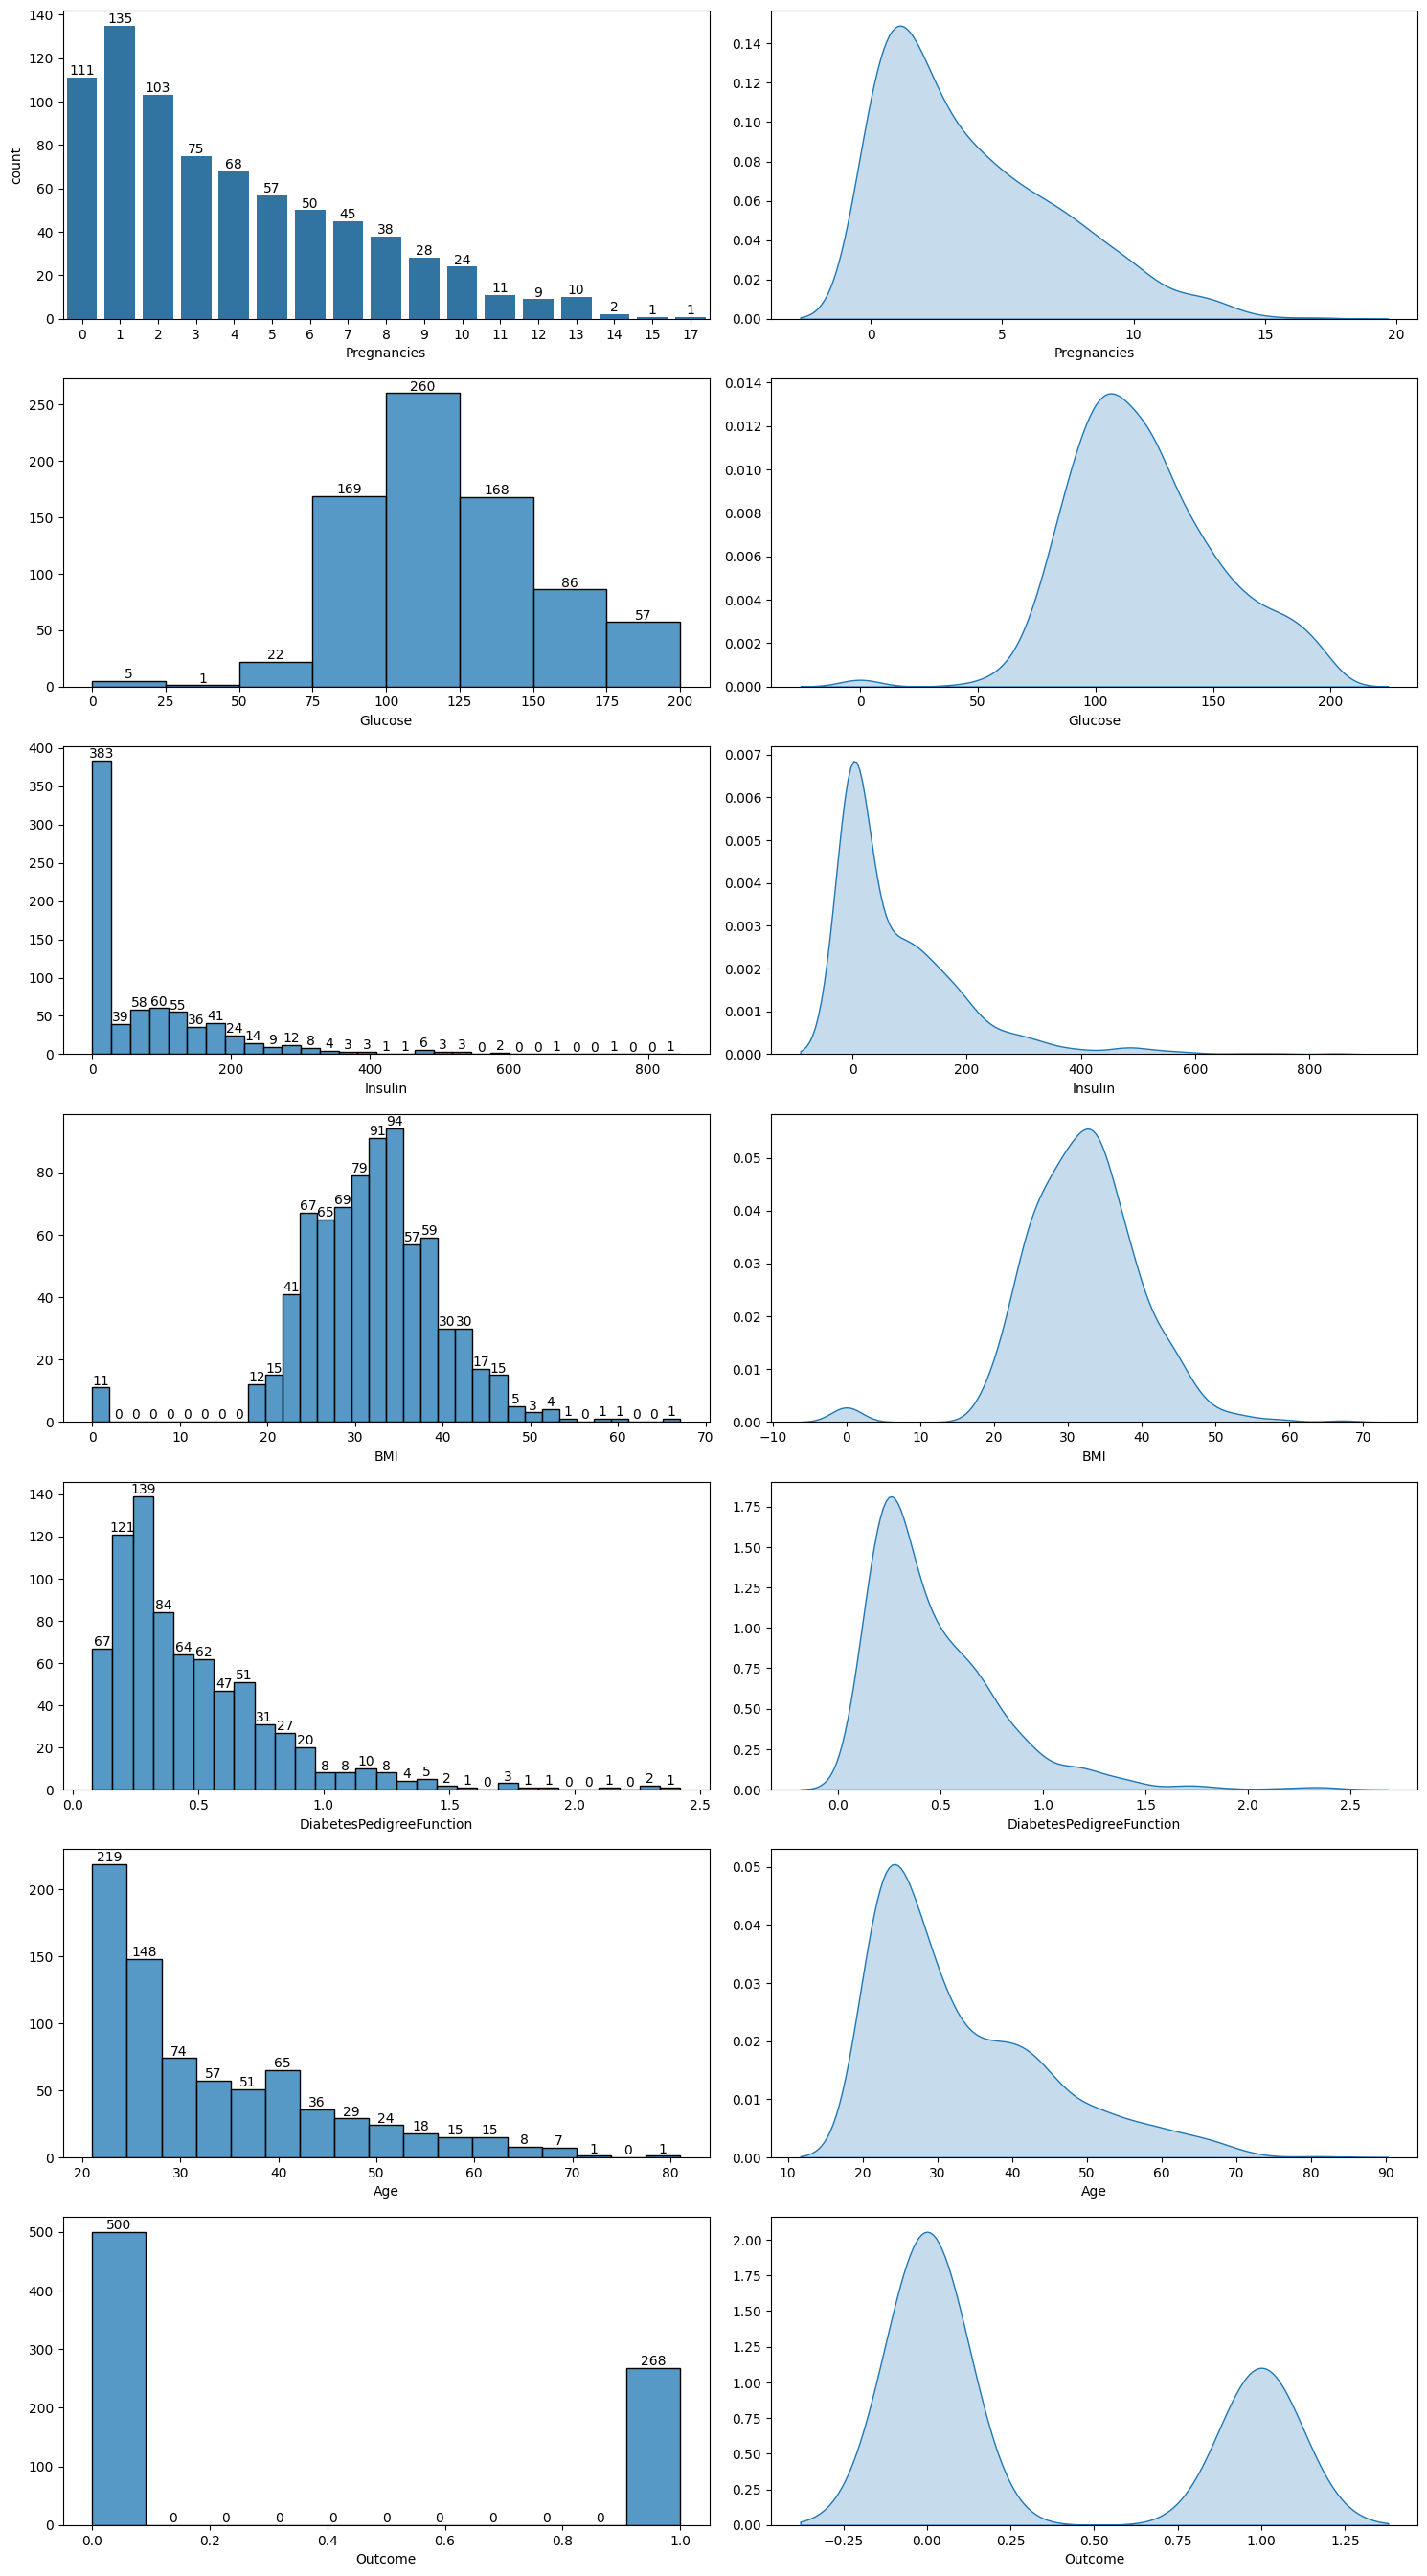

In [15]:
# Graficamos
fig, axis = plt.subplots(7,2, figsize = (15, 27))

# Crear un histograma múltiple
sns.countplot(ax = axis[0,0], data = df_diabetes, x = "Pregnancies")
axis[0,0].bar_label(axis[0,0].containers[0])
sns.kdeplot(ax = axis[0,1], data = df_diabetes["Pregnancies"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[1,0],data = df_diabetes, x = "Glucose", bins=(0,25,50,75,100,125,150,175,200)).set(ylabel = None)
axis[1,0].bar_label(axis[1,0].containers[0])
sns.kdeplot(ax = axis[1,1], data = df_diabetes["Glucose"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[2,0], data = df_diabetes, x = "Insulin").set(ylabel = None) 
axis[2,0].bar_label(axis[2,0].containers[0])
sns.kdeplot(ax = axis[2,1], data = df_diabetes["Insulin"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[3,0],data = df_diabetes, x = "BMI").set(ylabel = None) 
axis[3,0].bar_label(axis[3,0].containers[0])
sns.kdeplot(ax = axis[3,1], data = df_diabetes["BMI"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[4,0], data = df_diabetes, x = "DiabetesPedigreeFunction").set(ylabel = None)
axis[4,0].bar_label(axis[4,0].containers[0])
sns.kdeplot(ax = axis[4,1], data = df_diabetes["DiabetesPedigreeFunction"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[5,0], data = df_diabetes, x='Age').set(ylabel = None)
axis[5,0].bar_label(axis[5,0].containers[0])
sns.kdeplot(ax = axis[5,1], data = df_diabetes["Age"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[6,0], data = df_diabetes, x='Outcome').set(ylabel = None)
axis[6,0].bar_label(axis[6,0].containers[0])
sns.kdeplot(ax = axis[6,1], data = df_diabetes['Outcome'],fill=True).set(ylabel = None)

plt.tight_layout()
plt.show()

El análisis de los histogramas muestra la siguiente información:

* Pregnancies. 75% Valores son <= a 6, mediana = 3, media = 3.8, valor max 17. Sesgo positvo.
* Glucose. 75% Valores son <= a 140.25, mediana = 117.0, media = 120.9, valor max 199.
* Insulin. 75% Valores son <= a 127.25, mediana = 30.5, media = 79.8, valor max 846. Sesgo +.
* BMI. 75% Valores son <= a 36.6, mediana = 32.0, media = 32.0 %, moda=32. valor max 67.1. Distribucion Normal. Mediana=Media=Moda.
* DiabetesPedigreeFunction. 75% Valores son <= a 0.63, mediana = 0.37, media = 0.47, valor max 2.42. Sesgo +.
* Age. 75% Valores son <= a 41, mediana = 29, media = 33, valor max 81. Sesgo +.
* Outcome. 35% de los Valores son = a 1 y el 65% son iguales a 0. La variable clase esta desbalanceada

# Análisis Variables Multivariante

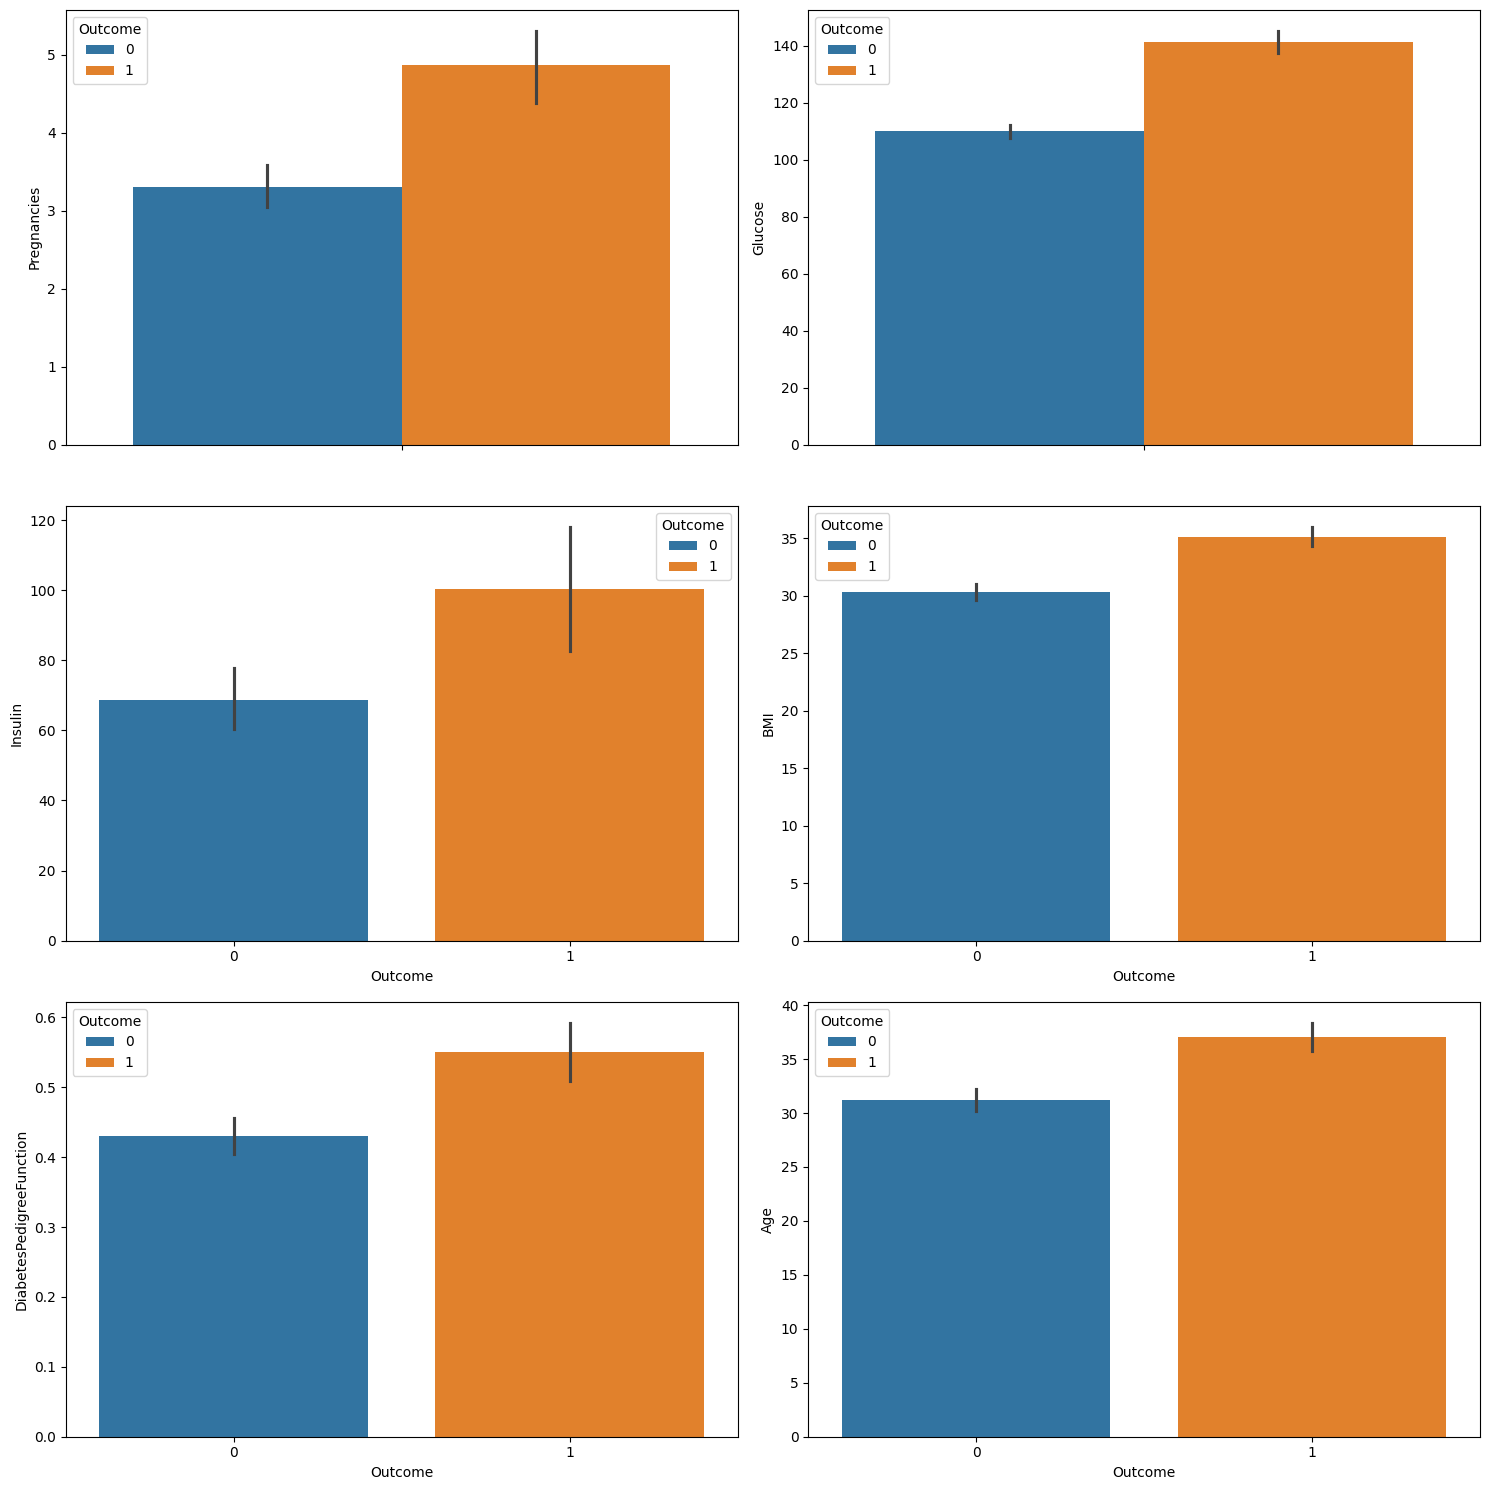

In [16]:
# Graficamos las variables predictoras vs la objetivo
fig, axis = plt.subplots(3,2, figsize = (15, 15))

sns.barplot(ax = axis[0, 0], data = df_diabetes, y="Pregnancies", hue='Outcome')
sns.barplot(ax = axis[0, 1], data = df_diabetes, y ="Glucose", hue='Outcome')
sns.barplot(ax = axis[1, 0],data=df_diabetes,x ='Outcome', y="Insulin", hue='Outcome')
sns.barplot(ax = axis[1,1],data=df_diabetes,x ='Outcome', y="BMI", hue='Outcome')
sns.barplot(ax = axis[2, 0],data=df_diabetes,x ='Outcome', y="DiabetesPedigreeFunction", hue='Outcome')
sns.barplot(ax = axis[2,1],data=df_diabetes,x ='Outcome', y="Age", hue='Outcome')

plt.tight_layout()
plt.show()

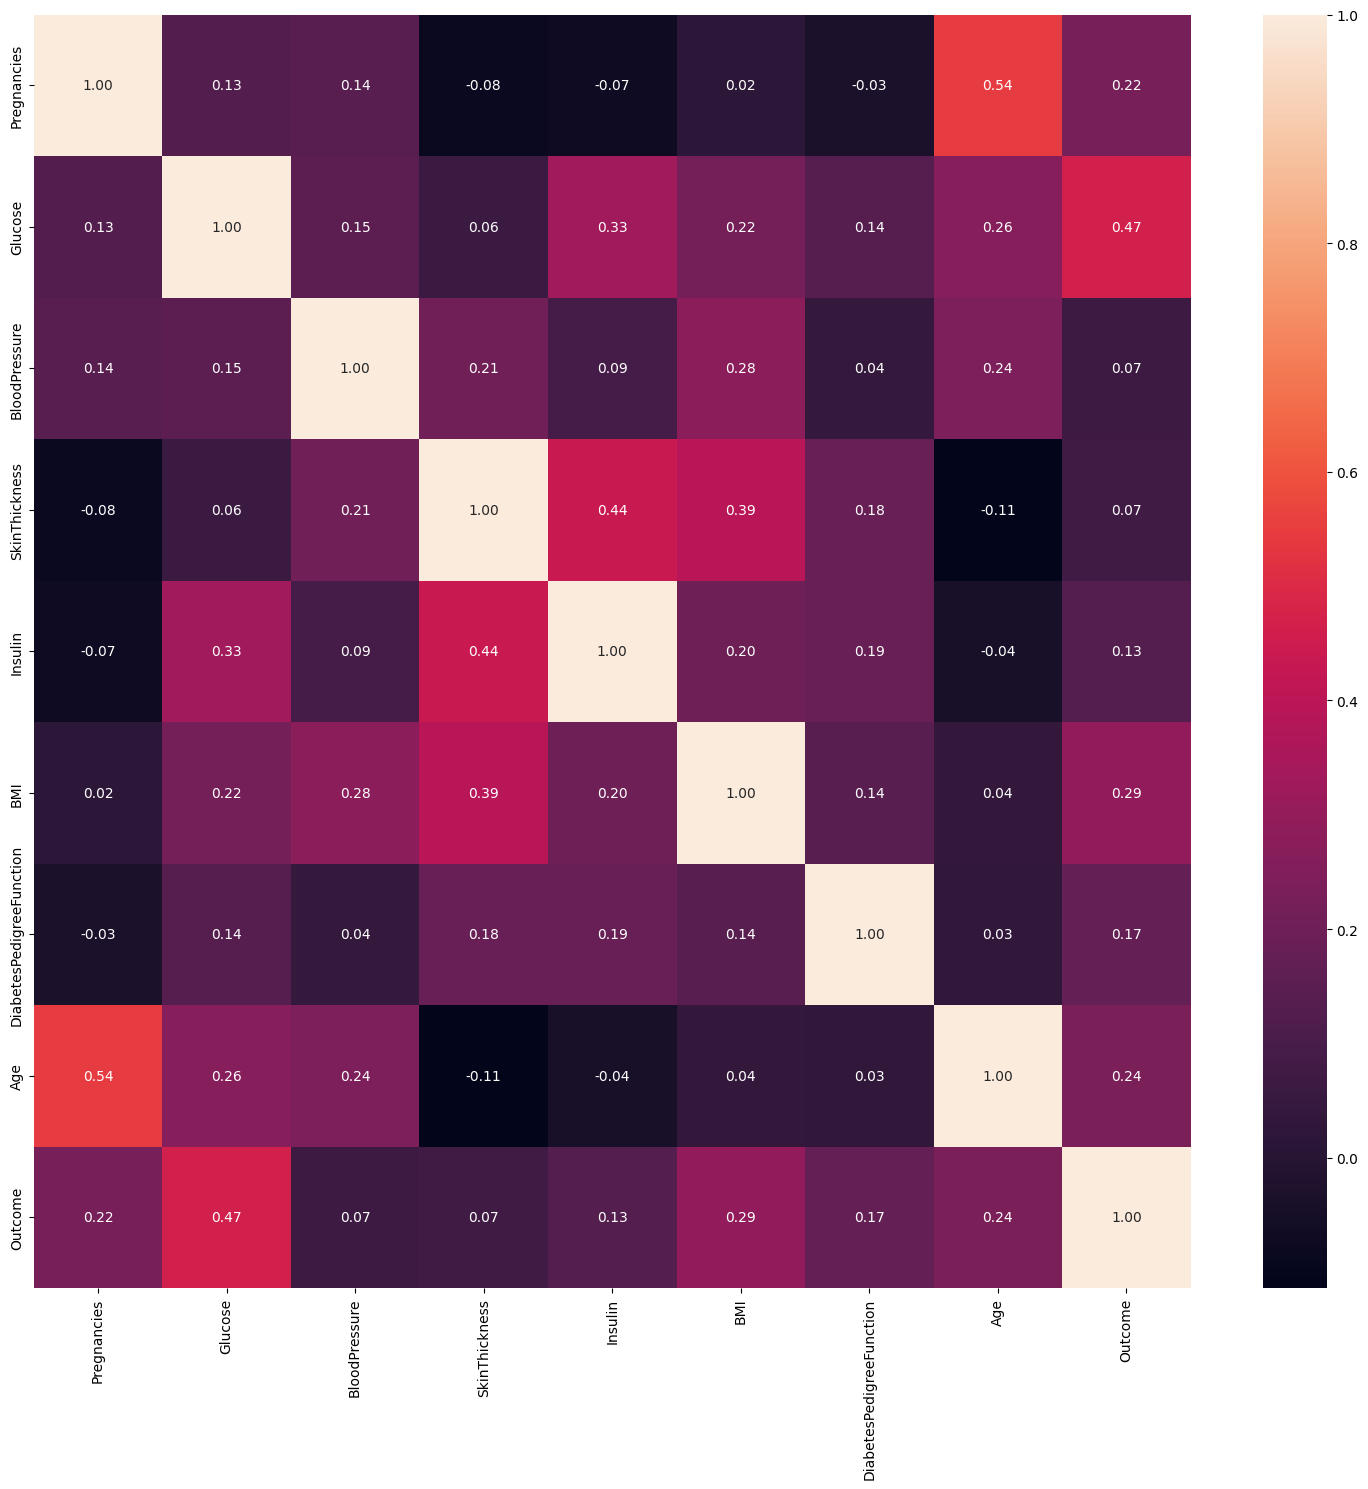

In [17]:
# Matriz de Correlación
fig, axis = plt.subplots(figsize = (15,15))
matriz_corr=df_diabetes.corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

* En orden descendente, el factor de correlación de las características con el target quedó determinado de la siguiente manera:

- Glucosa 0.47
- BMI 0.29
- Age 0.24
- Pregnancies 0.22
- DiabetesPedigreeFunction 0.17
- Insulin 0.13

* La relación observada es positiva, es decir, la presencia de la diabetis (valor 1), se observa con incrementos de cada una de las características. Los valores promedios de las caracteristicas son más altos en la clase 1 que 0.


# Ingeniería de Características

Primero debemos balancear la variable objetivo, debido a la poca cantidad de datos, realizaremos un Oversampling de la clase creando nuevos registros sintéticos mediante la interpolación de los registros existentes.

In [20]:
from imblearn.over_sampling import SMOTE

# Oversampling
var_x=['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=df_diabetes[var_x]
y=df_diabetes['Outcome']
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

In [21]:
X_bal.shape
y_bal

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [22]:
df_diabetes_bal=X_bal.join(y_bal)

In [23]:
df_diabetes_bal.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


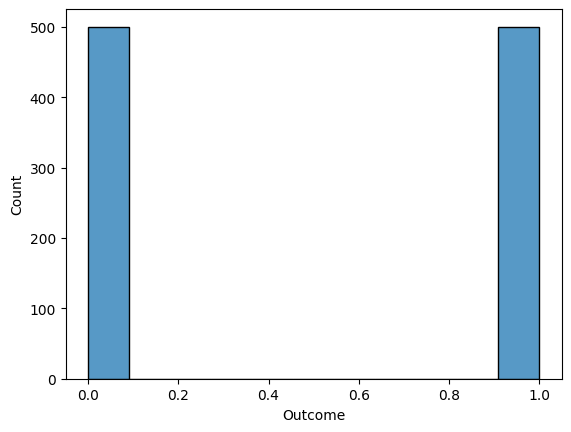

In [24]:
sns.histplot(data=df_diabetes_bal, x='Outcome')
plt.show()

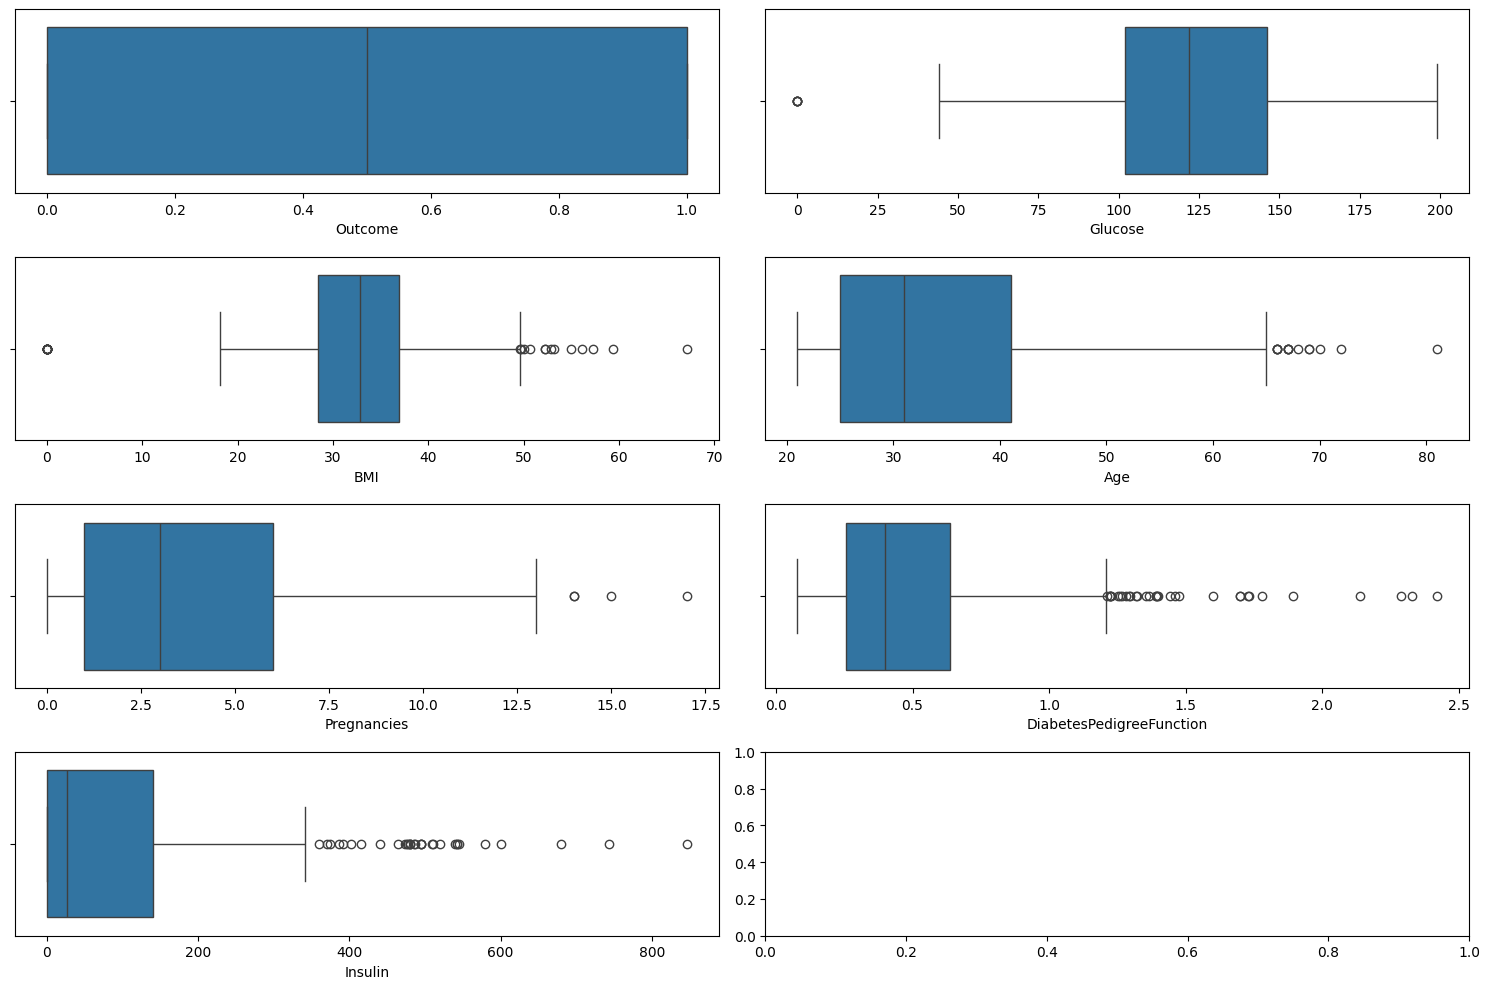

In [26]:
# Análisis de outliers
fig, axis = plt.subplots(4,2, figsize = (15, 10))

# Crear un histograma múltiple
sns.boxplot(ax = axis[0,0], data = df_diabetes_bal, x = "Outcome")
sns.boxplot(ax = axis[0,1], data = df_diabetes_bal, x = "Glucose")
sns.boxplot(ax = axis[1,0], data = df_diabetes_bal, x = "BMI")
sns.boxplot(ax = axis[1,1], data = df_diabetes_bal, x = "Age")
sns.boxplot(ax = axis[2,0], data = df_diabetes_bal, x = "Pregnancies")
sns.boxplot(ax = axis[2,1], data = df_diabetes_bal, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3,0], data = df_diabetes_bal, x = "Insulin")

plt.tight_layout()
plt.show()

In [27]:
gluc=X_bal['Glucose'].describe()
gluc_iqr=gluc['75%']-gluc['25%']
p_lim_sup=gluc['75%']+1.5*gluc_iqr
p_lim_inf=gluc['25%']-1.5*gluc_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(gluc_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 212.62 y 35.62, con un rango intercuartílico de 44.25


In [28]:
bbmi=X_bal['BMI'].describe()
bbmi_iqr=bbmi['75%']-bbmi['25%']
p_lim_sup=bbmi['75%']+1.5*bbmi_iqr
p_lim_inf=bbmi['25%']-1.5*bbmi_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(bbmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 49.65 y 15.65, con un rango intercuartílico de 8.5


In [29]:
preg=X_bal['Pregnancies'].describe()
preg_iqr=preg['75%']-preg['25%']
p_lim_sup=preg['75%']+1.5*preg_iqr
p_lim_inf=preg['25%']-1.5*preg_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(preg_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.5 y -6.5, con un rango intercuartílico de 5.0


In [30]:
ins=X_bal['Insulin'].describe()
ins_iqr=ins['75%']-ins['25%']
p_lim_sup=ins['75%']+1.5*ins_iqr
p_lim_inf=ins['25%']-1.5*ins_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(ins_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 350.0 y -210.0, con un rango intercuartílico de 140.0


In [31]:
dpf=X_bal['DiabetesPedigreeFunction'].describe()
dpf_iqr=dpf['75%']-dpf['25%']
p_lim_sup=dpf['75%']+1.5*dpf_iqr
p_lim_inf=dpf['25%']-1.5*dpf_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(dpf_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 1.21 y -0.32, con un rango intercuartílico de 0.38


In [32]:
X_bal.loc[X_bal['DiabetesPedigreeFunction']>1.5].count()

Pregnancies                 11
Glucose                     11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
dtype: int64

In [33]:
# Eliminamos outliers

X_bal.drop(X_bal[X_bal["Glucose"]==0].index,inplace=True)
X_bal.drop(X_bal[X_bal["BMI"]==0].index,inplace=True)
X_bal.drop(X_bal[X_bal["BMI"]>50].index,inplace=True)
X_bal.drop(X_bal[X_bal["Pregnancies"]>13.5].index,inplace=True)
X_bal.drop(X_bal[X_bal["Insulin"]>350].index,inplace=True)
X_bal.drop(X_bal[X_bal["DiabetesPedigreeFunction"]>1.5].index,inplace=True)

# Modelo Árbol de Desición

Dividimos Train y Test

In [36]:
y=df_diabetes_bal['Outcome']
X=df_diabetes_bal.drop('Outcome',axis=1)[var_x]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y.to_csv("/workspaces/Proyecto-Arbol-de-Decision/data/processed/y.csv",index=False)
X.to_csv("/workspaces/Proyecto-Arbol-de-Decision/data/processed/X.csv",index=False)
X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117,0,34.100000,0.337000,38
535,4,132,0,32.900000,0.302000,23
695,7,142,480,30.400000,0.128000,43
557,8,110,0,27.800000,0.237000,58
836,4,122,0,32.020995,0.256373,35


Entrenamiento del Modelo

In [37]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

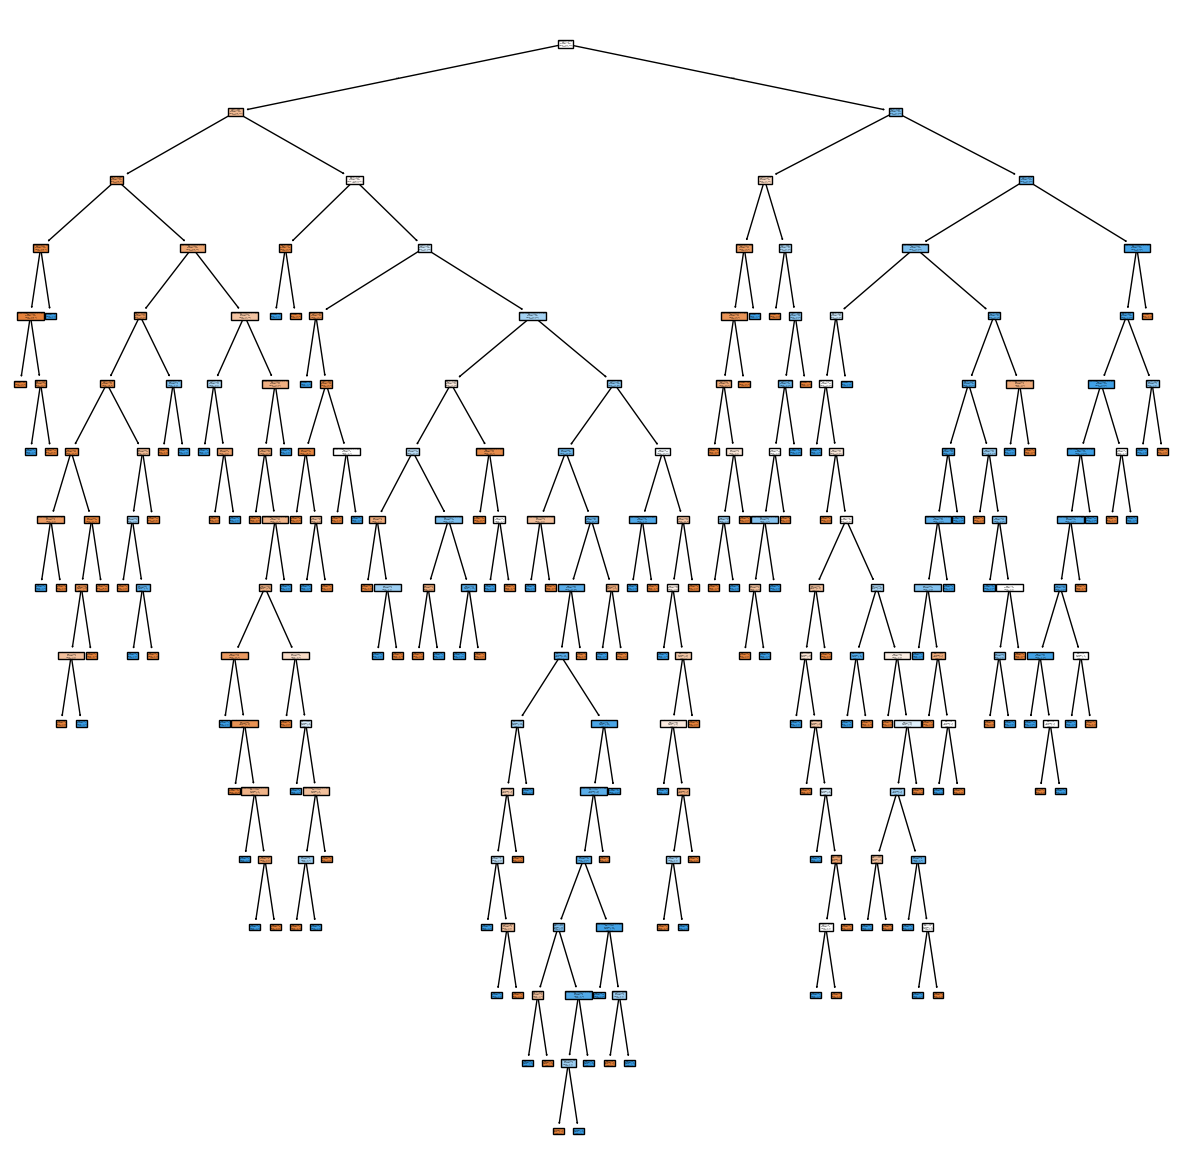

In [38]:
#Visualizamos modelo

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0])

In [41]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.725


# Optimización de Hiperparametros

In [49]:
# Grid Search

grid_space={'max_depth':[500,1000,1500], 
           'max_features':[5,6], 
           'criterion':['entropy','gini'], 
           'min_samples_leaf':[2,3,4,5], 
           'min_samples_split':[2,3,4] 
          }

In [50]:
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid=grid_space, scoring='accuracy', cv=5)
model_grid = dt_grid.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [52]:
print(f'Mejores Hiperparametros:: {model_grid.best_params_}')
print(f'Random search score es: {model_grid.best_score_}')

Mejores Hiperparametros:: {'criterion': 'gini', 'max_depth': 1000, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 3}
Random search score es: 0.77


In [53]:
model_gr = DecisionTreeClassifier(criterion='gini',max_depth=1000,
           max_features=5, min_samples_leaf=5, min_samples_split=3,
           random_state=42)
           
model_gr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1000, max_features=5, min_samples_leaf=5,
                       min_samples_split=3, random_state=42)

In [54]:
y_pred_gr = model_gr.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gr)}")
predicciones_exactas = accuracy_score(y_test, y_pred_gr, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.685
El número de predicciones exactas es:  137.0


Debido a que el Grid Search nos arroja valores de Accuracy inferiores a los iniciales probaremos con RandomSearch

In [55]:
# RandomSearch

dt_space={'max_depth':[None, 50,100,500,1000], 
           'max_features':randint(1,6), 
           'criterion':['gini','entropy'], 
           'min_samples_leaf':randint(1,4), 
           'min_samples_split':np.arange(2, 10, step=2) 
          }

In [56]:
dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(dt, dt_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
model_random = dt_random.fit(X_train, y_train)

In [57]:
print(f'Mejores Hiperparametros:: {model_random.best_params_}')
print(f'Random search score es: {model_random.best_score_}')

Mejores Hiperparametros:: {'criterion': 'gini', 'max_depth': 1000, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': np.int64(2)}
Random search score es: 0.7737499999999999


In [58]:
model_rd = DecisionTreeClassifier(criterion='gini',max_depth=1000,
           max_features=4, min_samples_leaf=1, min_samples_split=2,
           random_state=42)
           
model_rd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1000, max_features=4, random_state=42)

In [59]:
y_pred_rd = model_rd.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rd)}")
predicciones_exactas = accuracy_score(y_test, y_pred_rd, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.76
El número de predicciones exactas es:  152.0


# Guardado del Modelo

In [63]:
import joblib

model_path = '/workspaces/Proyecto-Arbol-de-Decision/models/model_rd.joblib'
# Save the model
joblib.dump(model_rd, model_path)

print(f"Modelo guardado en {model_path}")

Modelo guardado en /workspaces/Proyecto-Arbol-de-Decision/models/model_rd.joblib
